In [1]:
import librosa
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt 
import IPython.display as ipd

In [4]:
noisy_1,_ = librosa.load("noisy_1.wav",sr=16000)
noisy_2,_ = librosa.load("noisy_2.wav",sr=16000)

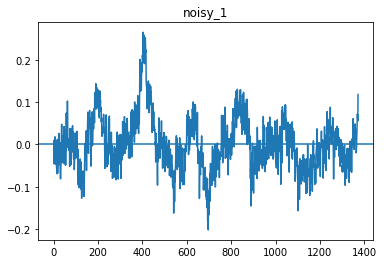

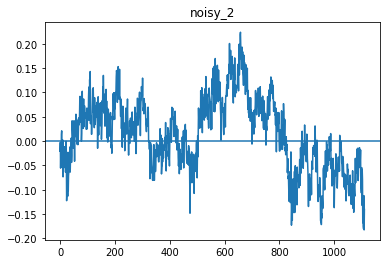

In [10]:
plt.plot(noisy_1)
plt.title("noisy_1")
plt.axhline(y=0)
plt.figure()
plt.plot(noisy_2)
plt.title("noisy_2")
plt.axhline(y=0)

## Preemphasis

In [20]:
x = noisy_2
sample  = x
display(ipd.Audio(sample,rate=16000))
out = np.zeros(x.shape)

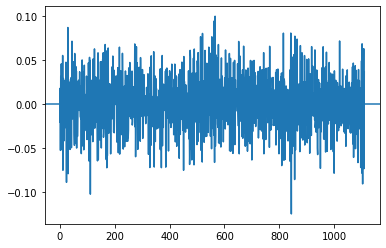

In [21]:
out[0]=x[0]
for i in range(1,len(x)) :
    out[i] = x[i]-0.97 * x[i-1]
display(ipd.Audio(out,rate=16000))
plt.plot(out)
plt.axhline(y=0)

(15000,)
(15000,)


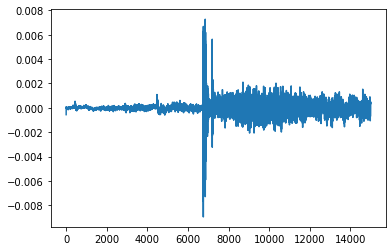

In [222]:
print(sample.shape)
out_lib = librosa.effects.preemphasis(sample)
print(out_lib.shape)
plt.plot(out_lib)

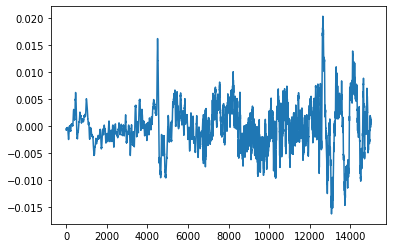

In [211]:
print(out_lib.shape)
de_lib = librosa.effects.deemphasis(out_lib)
print(de_lib.shape)
plt.plot(de_lib)

## De-emphasis

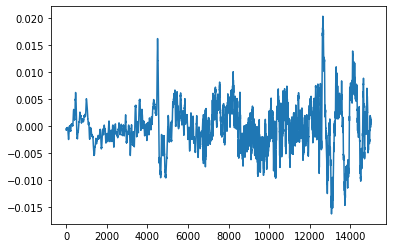

In [203]:
de = np.zeros(out.shape)
de[0]=out[0]
for i in range(1,len(out)) :
    de[i] = out[i]+ 0.97 * de[i-1]
display(ipd.Audio(de,rate=16000))
plt.plot(de)

# 3rd Order

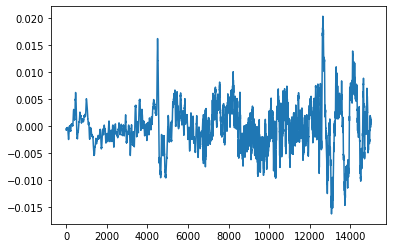

In [204]:
plt.plot(sample)

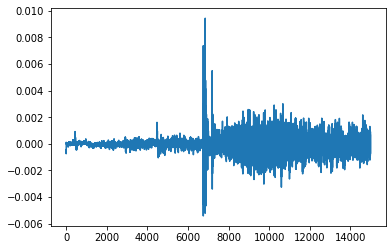

In [225]:
out3 = np.zeros(sample.shape)
out3[0]=sample[0]
out3[1]=sample[1]
out3[2]=sample[2]
for i in range(3,len(sample)) :
    out3[i] = sample[i]-0.97 * sample[i-1] +(0.97)**1 * sample[i-2] -(0.97)**1 * sample[i-3] 

display(ipd.Audio(out3,rate=16000))
display(plt.plot(out3))

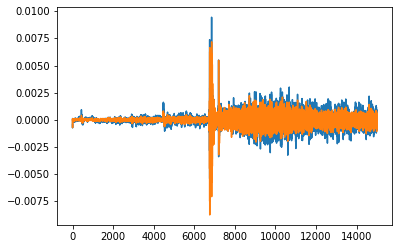

In [221]:
display(plt.plot(out3))
display(plt.plot(out3-out))

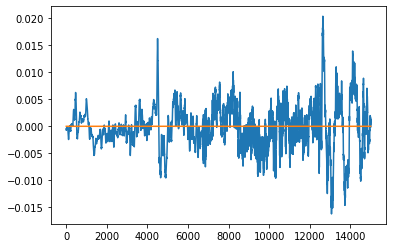

In [207]:
de = np.zeros(out3.shape)
de[0]=out3[0]
de[1]=out3[1]
de[2]=out3[2]
for i in range(3,len(de)) :
    de[i] = out3[i] + 0.97*de[i-1]-(0.97)**1*de[i-2]+(0.97)**1*de[i-3]
display(ipd.Audio(de,rate=16000))
display(plt.plot(de))
display(plt.plot(de-sample))